In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
df = pd.read_csv("exp_wk_44_48.csv")

In [244]:
df = df.fillna(0)

In [245]:
df.head()

,city3,wk,car_numb,total_ob,incentive_without_penalty,city_login
0,hyderabad,47,TS01UA2411,719.91,0.00,10.768889
1,hyderabad,44,TS01UA6452,14326.65,859.71,79.105000
2,hyderabad,48,TS01UB4891,5876.15,474.01,36.320000
3,hyderabad,45,TS01UB6795,16216.37,240.41,70.632222
4,hyderabad,44,TS02UA9216,7539.89,1390.45,41.667500


In [246]:
df = df.drop("city3",axis=1)
df["eph"] = (df["total_ob"]+df["incentive_without_penalty"])/df["city_login"]

In [247]:
df.loc[df.eph == float('inf'), 'eph'] = 0

In [248]:
wk44 = df[df.wk == 44]
wk45 = df[df.wk == 45]
wk46 = df[df.wk == 46]
wk47 = df[df.wk == 47]
wk48 = df[df.wk == 48]

In [249]:
wk44 = wk44.sort_values(by=['car_numb'],ascending=[True])
wk45 = wk45.sort_values(by=['car_numb'],ascending=[True])
wk46 = wk46.sort_values(by=['car_numb'],ascending=[True])
wk47 = wk47.sort_values(by=['car_numb'],ascending=[True])
wk48 = wk48.sort_values(by=['car_numb'],ascending=[True])

In [250]:
l = []
for i in range(1,1515):
    l.append(i)
wk44["index"] = l
wk45["index"] = l
wk46["index"] = l
wk47["index"] = l

In [251]:
wk44.set_index("index",inplace=True)
wk45.set_index("index",inplace=True)
wk46.set_index("index",inplace=True)
wk47.set_index("index",inplace=True)

In [252]:
wk48["index"] = l

In [253]:
wk48.set_index("index",inplace=True)

In [254]:
wk44["wk45login"] = wk45["city_login"]
wk44.head()

,wk,car_numb,total_ob,incentive_without_penalty,city_login,eph,wk45login
index,,,,,,,
1,44,TS01UA2411,1580.86,0.00,16.798889,94.105033,45.377778
2,44,TS01UA4308,4599.26,0.00,26.769722,171.808283,40.839722
3,44,TS01UA4945,4731.71,0.00,45.158611,104.779795,21.120000
4,44,TS01UA6452,14326.65,859.71,79.105000,191.977245,58.638056
5,44,TS01UA7585,11312.36,2591.19,66.002778,210.650983,65.135556


In [255]:
wk45["wk46login"] = wk46["city_login"]
wk46["wk47login"] = wk47["city_login"]
wk47["wk48login"] = wk48["city_login"]

In [256]:
wk46["change%"] = ((wk46['wk47login']-wk46['city_login'])/wk46['city_login']) * 100

In [257]:
wk44["change%"] = ((wk44['wk45login']-wk44['city_login'])/wk44['city_login']) * 100
wk45["change%"] = ((wk45['wk46login']-wk45['city_login'])/wk45['city_login']) * 100
wk47["change%"] = ((wk47['wk48login']-wk47['city_login'])/wk47['city_login']) * 100

In [258]:
templist = wk44["car_numb"]

In [259]:
wk44.head()

,wk,car_numb,total_ob,incentive_without_penalty,city_login,eph,wk45login,change%
index,,,,,,,,
1,44,TS01UA2411,1580.86,0.00,16.798889,94.105033,45.377778,170.123685
2,44,TS01UA4308,4599.26,0.00,26.769722,171.808283,40.839722,52.559380
3,44,TS01UA4945,4731.71,0.00,45.158611,104.779795,21.120000,-53.231511
4,44,TS01UA6452,14326.65,859.71,79.105000,191.977245,58.638056,-25.873136
5,44,TS01UA7585,11312.36,2591.19,66.002778,210.650983,65.135556,-1.313918


In [260]:
wk44.drop(["wk","car_numb","wk45login"], axis=1, inplace=True)

In [261]:
wk44.columns = ['total_ob', 'incentive_without_penalty', 'city_login', 'eph','changep']

In [262]:
wk45.drop(["wk","car_numb","wk46login"], axis=1, inplace=True)
wk46.drop(["wk","car_numb","wk47login"], axis=1, inplace=True)
wk47.drop(["wk","car_numb","wk48login"], axis=1, inplace=True)
wk45.columns = ['total_ob', 'incentive_without_penalty', 'city_login', 'eph','changep']
wk46.columns = ['total_ob', 'incentive_without_penalty', 'city_login', 'eph','changep']
wk47.columns = ['total_ob', 'incentive_without_penalty', 'city_login', 'eph','changep']

In [263]:
wk44 = wk44[wk44.city_login !=0]
wk45 = wk45[wk45.city_login !=0]
wk46 = wk46[wk46.city_login !=0]
wk47 = wk47[wk47.city_login !=0]

In [264]:
wk45[wk45.changep >200].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,1640.843125,147.886250,10.079442,172.553804,488.597707
std,1492.412231,416.434775,8.039722,73.584575,451.707200
min,76.170000,0.000000,0.630833,11.353734,200.241471
25%,544.242500,0.000000,4.204028,121.259454,254.414375
50%,1170.715000,0.000000,7.636389,171.764882,353.733948
75%,2460.540000,43.977500,13.663542,215.796927,532.815183
max,7426.650000,2853.160000,35.223611,455.317523,3319.081447


In [265]:
wk46["wk47login"] = wk47["city_login"]
wk46.describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,wk47login
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,6925.229921,1006.287991,40.081812,191.980943,52.955704,39.583547
std,5313.678503,1755.382971,28.540837,79.962257,240.530419,27.181175
min,69.890000,-1194.744000,0.380000,-176.288893,-95.006593,0.436389
25%,2459.850000,0.000000,16.164444,149.321702,-31.623824,16.734722
50%,5824.840000,16.950000,35.947500,196.296818,-0.399853,35.661667
75%,10444.910000,1359.360000,58.534444,234.756231,47.864577,57.354444
max,29238.970000,17378.180000,147.789722,1689.894737,3010.935412,141.734444


In [266]:
wk46[wk46.changep<-20].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,wk47login
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,8204.549525,1299.280080,47.854218,191.081476,-47.707051,26.174532
std,5422.881440,1944.173514,28.585198,65.604997,20.521141,20.623796
min,77.300000,-135.296000,1.077778,12.068173,-95.006593,0.436389
25%,3803.697500,0.000000,24.270208,152.518929,-62.990931,9.676181
50%,7760.795000,286.858500,46.495139,196.148443,-44.196726,21.322222
75%,11687.467500,2159.572500,65.591667,235.182119,-29.594366,39.064583
max,26521.690000,11592.190000,133.030278,444.079215,-20.021188,102.793056


In [267]:
tempdf = wk46
templ = []
for i in range(1,1514):
    templ.append(True)
tempdf["status"] = templ
tempdf

,total_ob,incentive_without_penalty,city_login,eph,changep,wk47login,status
index,,,,,,,
1,6395.70,0.00,31.358333,203.955355,-65.658606,10.768889,True
2,4105.47,60.29,23.676944,175.941622,13.254807,26.815278,True
3,262.63,0.00,12.003889,21.878743,5.333920,12.644167,True
4,13535.50,1288.20,67.733611,218.852941,-32.632740,45.630278,True
5,1943.76,334.40,42.693611,53.360677,-32.845143,28.670833,True
6,7770.04,0.00,33.098333,234.756231,0.252614,33.181944,True
7,9957.54,3480.18,57.607222,233.264502,-69.923717,17.326111,True
8,5898.19,0.00,32.654167,180.625954,3.863723,33.915833,True
9,11630.02,1118.91,61.979167,205.697022,28.074398,79.379444,True


In [269]:
tempdf.loc[wk46["changep"]<=-20,"status"] = False
tempdf

,total_ob,incentive_without_penalty,city_login,eph,changep,wk47login,status
index,,,,,,,
1,6395.70,0.00,31.358333,203.955355,-65.658606,10.768889,False
2,4105.47,60.29,23.676944,175.941622,13.254807,26.815278,True
3,262.63,0.00,12.003889,21.878743,5.333920,12.644167,True
4,13535.50,1288.20,67.733611,218.852941,-32.632740,45.630278,False
5,1943.76,334.40,42.693611,53.360677,-32.845143,28.670833,False
6,7770.04,0.00,33.098333,234.756231,0.252614,33.181944,True
7,9957.54,3480.18,57.607222,233.264502,-69.923717,17.326111,False
8,5898.19,0.00,32.654167,180.625954,3.863723,33.915833,True
9,11630.02,1118.91,61.979167,205.697022,28.074398,79.379444,True


In [270]:
tempdf.drop(["changep","wk47login"],axis=1,inplace=True)

In [271]:
tempdf.drop(["city_login"],axis=1,inplace=True)

In [272]:
tempdf

,total_ob,incentive_without_penalty,eph,status
index,,,,
1,6395.70,0.00,203.955355,False
2,4105.47,60.29,175.941622,True
3,262.63,0.00,21.878743,True
4,13535.50,1288.20,218.852941,False
5,1943.76,334.40,53.360677,False
6,7770.04,0.00,234.756231,True
7,9957.54,3480.18,233.264502,False
8,5898.19,0.00,180.625954,True
9,11630.02,1118.91,205.697022,True


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X = tempdf.drop(["status","total_ob"],axis=1)

In [275]:
y = tempdf["status"]

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [277]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [278]:
predictions = dtree.predict(X_test)

In [279]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.33      0.38      0.35       255
       True       0.66      0.61      0.63       502

avg / total       0.55      0.53      0.54       757



In [280]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [281]:
rfc_pred = rfc.predict(X_test)

In [282]:
print(confusion_matrix(y_test,rfc_pred))

[[ 85 170]
 [188 314]]


In [283]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

      False       0.31      0.33      0.32       255
       True       0.65      0.63      0.64       502

avg / total       0.54      0.53      0.53       757



In [284]:
from sklearn.linear_model import LogisticRegression

In [285]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [286]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.52      0.05      0.09       255
       True       0.67      0.98      0.79       502

avg / total       0.62      0.66      0.56       757



tempdf1 = wk46

In [287]:
tempdf1 = wk46

In [294]:
bak = df[df.wk == 46]

In [296]:
bak = bak.sort_values(by=['car_numb'],ascending=[True])

In [298]:
l = []
for i in range(1,1515):
    l.append(i)
bak["index"] = l
bak = bak.set_index("index")

In [300]:
bak.head()

,wk,car_numb,total_ob,incentive_without_penalty,city_login,eph
index,,,,,,
1,46,TS01UA2411,6395.70,0.00,31.358333,203.955355
2,46,TS01UA4308,4105.47,60.29,23.676944,175.941622
3,46,TS01UA4945,262.63,0.00,12.003889,21.878743
4,46,TS01UA6452,13535.50,1288.20,67.733611,218.852941
5,46,TS01UA7585,1943.76,334.40,42.693611,53.360677


In [301]:
tempdf1["city_login"] = bak["city_login"]

In [305]:
tempdf1.head()

,total_ob,incentive_without_penalty,eph,status,city_login
index,,,,,
1,6395.70,0.00,203.955355,False,31.358333
2,4105.47,60.29,175.941622,True,23.676944
3,262.63,0.00,21.878743,True,12.003889
4,13535.50,1288.20,218.852941,False,67.733611
5,1943.76,334.40,53.360677,False,42.693611


In [313]:
X = tempdf1.drop(["status","total_ob"],axis=1)
y = tempdf1["status"]

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [315]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.35      0.38      0.36       163
       True       0.69      0.66      0.67       337

avg / total       0.58      0.57      0.57       500



In [317]:
tempdf1.drop("status",axis=1,inplace=True)

In [352]:
tempdf1["wk47login"] = wk47["city_login"]

In [353]:
tempdf1["changep"] = ((tempdf1['wk47login']-tempdf1['city_login'])/tempdf1['city_login']) * 100

In [354]:
tempdf1.describe()

,total_ob,incentive_without_penalty,eph,city_login,wk47login,changep
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,6925.229921,1006.287991,191.980943,40.081812,39.583547,52.955704
std,5313.678503,1755.382971,79.962257,28.540837,27.181175,240.530419
min,69.890000,-1194.744000,-176.288893,0.380000,0.436389,-95.006593
25%,2459.850000,0.000000,149.321702,16.164444,16.734722,-31.623824
50%,5824.840000,16.950000,196.296818,35.947500,35.661667,-0.399853
75%,10444.910000,1359.360000,234.756231,58.534444,57.354444,47.864577
max,29238.970000,17378.180000,1689.894737,147.789722,141.734444,3010.935412


In [355]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [356]:
tempdf1[tempdf1.changep <-20].describe()

,total_ob,incentive_without_penalty,eph,city_login,wk47login,changep
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,8204.549525,1299.280080,191.081476,47.854218,26.174532,-47.707051
std,5422.881440,1944.173514,65.604997,28.585198,20.623796,20.521141
min,77.300000,-135.296000,12.068173,1.077778,0.436389,-95.006593
25%,3803.697500,0.000000,152.518929,24.270208,9.676181,-62.990931
50%,7760.795000,286.858500,196.148443,46.495139,21.322222,-44.196726
75%,11687.467500,2159.572500,235.182119,65.591667,39.064583,-29.594366
max,26521.690000,11592.190000,444.079215,133.030278,102.793056,-20.021188


In [357]:
knndata = tempdf1

In [359]:
knndata = wk46
templ = []
for i in range(1,1514):
    templ.append(True)
knndata["status"] = templ

In [364]:
knndata.loc[knndata["changep"]<-20,"status"] = False
knndata.head()

,total_ob,incentive_without_penalty,eph,city_login,wk47login,changep,status
index,,,,,,,
1,6395.70,0.00,203.955355,31.358333,10.768889,-65.658606,False
2,4105.47,60.29,175.941622,23.676944,26.815278,13.254807,True
3,262.63,0.00,21.878743,12.003889,12.644167,5.333920,True
4,13535.50,1288.20,218.852941,67.733611,45.630278,-32.632740,False
5,1943.76,334.40,53.360677,42.693611,28.670833,-32.845143,False


In [366]:
scaler.fit(knndata.drop(["wk47login","changep","status"],axis=1))
scaled_features = scaler.transform(knndata.drop(["wk47login","changep","status"],axis=1))

In [367]:
df_feat = pd.DataFrame(scaled_features,columns=knndata.columns[:-3])
df_feat.head()

,total_ob,incentive_without_penalty,eph,city_login
0,-0.099687,-0.573448,0.149800,-0.305750
1,-0.530836,-0.539091,-0.200652,-0.574976
2,-1.254273,-0.573448,-2.127984,-0.984106
3,1.244421,0.160652,0.336170,0.969171
4,-0.937790,-0.382885,-1.734144,0.091541


In [368]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,knndata["status"],test_size=0.33)

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [370]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [371]:
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.36      0.36      0.36       165
       True       0.68      0.68      0.68       335

avg / total       0.58      0.57      0.57       500



In [372]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

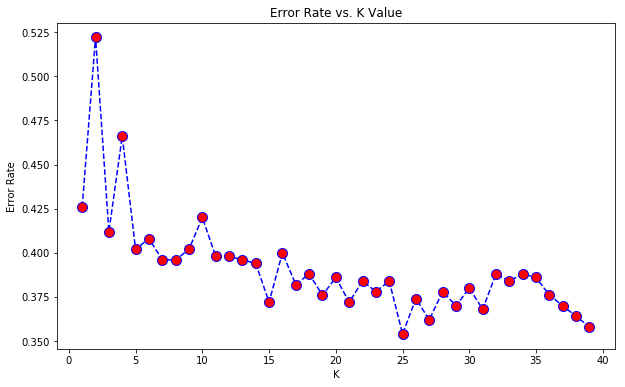

In [373]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [384]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [385]:
pred = knn.predict(X_test)

In [386]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      False       0.44      0.25      0.32       165
       True       0.69      0.84      0.76       335

avg / total       0.61      0.65      0.61       500



In [387]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.40      0.45      0.43       165
       True       0.71      0.67      0.69       335

avg / total       0.61      0.60      0.60       500



In [418]:
wk47["status"] = templ
wk47.loc[wk47["changep"]<-20,"status"] = False
wk47.head()

,total_ob,incentive_without_penalty,city_login,eph,changep,status
index,,,,,,
1,719.91,0.00,10.768889,66.850908,158.158791,True
2,3467.62,714.14,26.815278,155.946921,36.011809,True
3,275.57,0.00,12.644167,21.794240,21.268042,True
4,10220.51,1067.12,45.630278,247.371494,61.429119,True
5,5827.06,718.54,28.670833,228.301700,49.704985,True


In [413]:
X_train, X_test, y_train, y_test = train_test_split(wk47.drop(["status","changep"],axis=1),wk47["status"],test_size=0.40)

In [414]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       0.30      0.33      0.31       195
       True       0.67      0.64      0.65       411

avg / total       0.55      0.54      0.54       606



In [416]:
scaler.fit(wk47.drop(["changep","status"],axis=1))
scaled_features = scaler.transform(wk47.drop(["changep","status"],axis=1))

In [420]:
wk47.drop("status",axis=1,inplace=True)

In [422]:
from sklearn.cluster import KMeans

In [423]:
kmeans = KMeans(n_clusters=2)

In [424]:
wk47.head()

,total_ob,incentive_without_penalty,city_login,eph,changep
index,,,,,
1,719.91,0.00,10.768889,66.850908,158.158791
2,3467.62,714.14,26.815278,155.946921,36.011809
3,275.57,0.00,12.644167,21.794240,21.268042
4,10220.51,1067.12,45.630278,247.371494,61.429119
5,5827.06,718.54,28.670833,228.301700,49.704985


In [426]:
scaler.fit(wk47.drop(["city_login","eph"],axis=1))
scaled_features = scaler.transform(wk47.drop(["city_login","eph"],axis=1))

In [428]:
df_feat = pd.DataFrame(scaled_features,columns=["total_ob","incentive_without_penalty","changep"])

In [430]:
kmeans.fit(df_feat.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [433]:
wk47["category"] = kmeans.labels_

1059


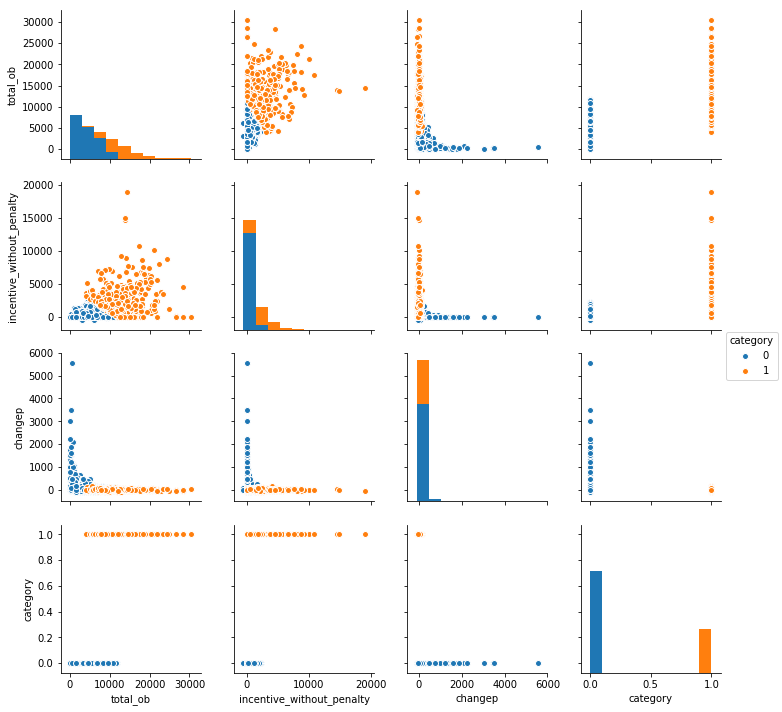

In [441]:
sns.pairplot(wk47.drop(["city_login","eph"],axis=1),hue='category')
count=0
for i in kmeans.labels_:
    if(i==0):
        count=count+1
print(count)

In [442]:
wk47

,total_ob,incentive_without_penalty,city_login,eph,changep,category
index,,,,,,
1,719.91,0.00,10.768889,66.850908,158.158791,0
2,3467.62,714.14,26.815278,155.946921,36.011809,0
3,275.57,0.00,12.644167,21.794240,21.268042,0
4,10220.51,1067.12,45.630278,247.371494,61.429119,1
5,5827.06,718.54,28.670833,228.301700,49.704985,0
6,5214.82,853.80,33.181944,182.889222,77.617513,0
7,3270.80,437.20,17.326111,214.012249,109.625806,0
8,6516.63,0.00,33.915833,192.141232,50.224002,0
9,16153.01,2208.16,79.379444,231.308875,-38.774732,1


In [445]:
wk46.head()

,total_ob,incentive_without_penalty,eph,city_login,wk47login,changep
index,,,,,,
1,6395.70,0.00,203.955355,31.358333,10.768889,-65.658606
2,4105.47,60.29,175.941622,23.676944,26.815278,13.254807
3,262.63,0.00,21.878743,12.003889,12.644167,5.333920
4,13535.50,1288.20,218.852941,67.733611,45.630278,-32.632740
5,1943.76,334.40,53.360677,42.693611,28.670833,-32.845143


In [448]:
scaler.fit(wk46.drop(["city_login","eph","wk47login"],axis=1))
scaled_features = scaler.transform(wk46.drop(["city_login","eph","wk47login"],axis=1))

In [449]:
df_feat = pd.DataFrame(scaled_features,columns=["total_ob","incentive_without_penalty","changep"])

In [450]:
kmeans.fit(df_feat.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [452]:
wk46["category"] = kmeans.labels_

1080


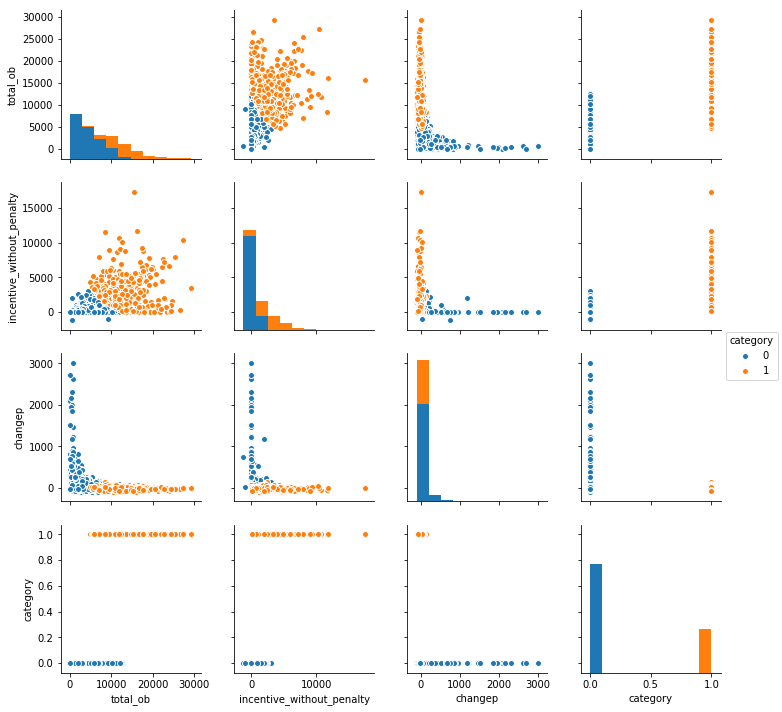

In [454]:
sns.pairplot(wk46.drop(["city_login","eph","wk47login"],axis=1),hue='category')
count=0
for i in kmeans.labels_:
    if(i==0):
        count=count+1
print(count)

In [458]:
error=0
right=0
wk46l = wk46["category"]
wk47l = wk47["category"]
for i,j in zip(wk46l,wk47l):
    if(i==j):
        right=right+1
    else:
        error=error+1
print(right)
print(error)    

1166
347


In [465]:
wk47[wk47.category==1].describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,category
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.0
mean,12739.068921,2568.961425,67.883783,231.756724,-8.054566,1.0
std,4103.586248,2222.456001,21.540666,47.287082,35.788775,0.0
min,4022.280000,0.000000,25.005000,101.232856,-97.650878,1.0
25%,9988.700000,1079.727500,52.172986,202.514670,-30.650839,1.0
50%,12332.320000,2226.355000,65.334306,230.233700,-7.729889,1.0
75%,14776.857500,3529.727500,79.630417,256.345093,11.292912,1.0
max,30432.540000,18994.700000,141.734444,405.365607,156.137264,1.0


In [463]:
wk47.describe()

,total_ob,incentive_without_penalty,city_login,eph,changep,category
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,6734.791824,948.395565,39.583547,189.096165,52.919601,0.300066
std,5136.987865,1659.054109,27.181175,71.693864,276.695268,0.458438
min,59.200000,-500.000000,0.436389,1.983783,-97.650878,0.000000
25%,2479.870000,0.000000,16.734722,142.650347,-30.938875,0.000000
50%,5733.080000,116.460000,35.661667,192.304738,1.260727,0.000000
75%,9985.990000,1346.900000,57.354444,233.102230,48.416279,1.000000
max,30432.540000,18994.700000,141.734444,904.429530,5558.970917,1.000000
